<h2>Reference:</h2> 
<p>Datasets are from https://www.kaggle.com/datasets/pankajjsh06/ibm-watson-marketing-customer-value-data, https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents/codepart </p>
<p>Part of analysis uses code from MENGJIE CHEN, https://www.kaggle.com/code/mengjiechen21/ibm-watson-customer-segmentation-using-k-means</p>

In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('after_merge.csv', index_col=[0])
df.dtypes

State Abbreviation                object
Accident Severity in State       float64
Number of Accidents in State       int64
State                             object
Customer                          object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amou

In [19]:
#df

In [20]:
cat1 = df.select_dtypes(include='object')
cat2 = cat1.drop(['Customer','Effective To Date'], axis = 1)  #but Customer and Date are not categorical

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for c in cat2.columns:
    cat2[c] = encoder.fit_transform(cat2[c])
cat2

,State Abbreviation,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,4,4,0,0,0,1,0,1,1,0,2,0,0,5,1
1,0,0,0,1,0,4,0,1,2,1,5,2,0,0,1
2,2,2,0,2,0,1,0,1,1,1,5,0,0,5,1
3,1,1,0,0,0,4,1,1,1,0,1,0,2,3,1
4,4,4,0,0,0,1,1,0,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,1,0,0,0,1,1,2,1,1,3,1,3,0,1
9130,1,1,1,1,1,1,0,1,0,0,2,0,1,0,1
9131,1,1,0,1,0,4,1,1,2,0,1,0,1,0,1
9132,1,1,0,1,1,1,1,1,1,1,4,2,1,0,0


In [22]:
import statsmodels.api as sm
from sklearn import preprocessing

In [23]:
conti = df.select_dtypes(include=['int64','float'])
conti.reset_index(drop = True, inplace=True)
def stan(data):
    new_data=(data-data.mean())/data.std()
    return new_data
conti=stan(conti)
conti

,Accident Severity in State,Number of Accidents in State,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2.537182,-0.848079,-0.762836,0.612794,-0.703886,1.678007,-1.543202,-0.422226,-0.822603,-0.169630
1,-0.333633,-0.778488,-0.149237,-1.239549,0.022690,-0.208175,-0.217322,-0.422226,2.106045,2.400606
2,1.574369,-0.924665,0.710597,0.365690,0.429572,0.288189,-0.360661,-0.422226,-0.404225,0.455709
3,-0.669515,1.369881,-0.052260,-1.239549,0.371446,0.288189,0.606873,-0.422226,1.687666,0.329750
4,2.537182,-0.848079,-0.755534,0.203379,-0.587634,-0.307448,-0.145653,-0.422226,-0.822603,-1.018788
...,...,...,...,...,...,...,...,...,...,...
9129,-0.669515,1.369881,2.241467,1.128497,-0.587634,0.288189,1.466904,-0.422226,-0.404225,-0.811890
9130,-0.669515,1.369881,-0.714372,-0.528421,-0.413256,-0.108902,-0.719007,-0.422226,-0.822603,-0.188946
9131,-0.669515,1.369881,0.023134,-1.239549,-0.238878,-0.605266,-0.396495,2.873088,-0.404225,1.227869
9132,-0.669515,1.369881,-0.069932,-0.517328,0.080816,1.876553,-1.614872,-0.422226,0.014154,0.885064


In [24]:
preprocessing.scale(conti,axis=0, with_mean=True, with_std=True, copy=True)
cat2.reset_index(drop = True, inplace=True)
all_data_df = pd.concat([conti,cat2], axis = 1)
all_data_df

,Accident Severity in State,Number of Accidents in State,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,...,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,2.537182,-0.848079,-0.762836,0.612794,-0.703886,1.678007,-1.543202,-0.422226,-0.822603,-0.169630,...,1,0,1,1,0,2,0,0,5,1
1,-0.333633,-0.778488,-0.149237,-1.239549,0.022690,-0.208175,-0.217322,-0.422226,2.106045,2.400606,...,4,0,1,2,1,5,2,0,0,1
2,1.574369,-0.924665,0.710597,0.365690,0.429572,0.288189,-0.360661,-0.422226,-0.404225,0.455709,...,1,0,1,1,1,5,0,0,5,1
3,-0.669515,1.369881,-0.052260,-1.239549,0.371446,0.288189,0.606873,-0.422226,1.687666,0.329750,...,4,1,1,1,0,1,0,2,3,1
4,2.537182,-0.848079,-0.755534,0.203379,-0.587634,-0.307448,-0.145653,-0.422226,-0.822603,-1.018788,...,1,1,0,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,-0.669515,1.369881,2.241467,1.128497,-0.587634,0.288189,1.466904,-0.422226,-0.404225,-0.811890,...,1,1,2,1,1,3,1,3,0,1
9130,-0.669515,1.369881,-0.714372,-0.528421,-0.413256,-0.108902,-0.719007,-0.422226,-0.822603,-0.188946,...,1,0,1,0,0,2,0,1,0,1
9131,-0.669515,1.369881,0.023134,-1.239549,-0.238878,-0.605266,-0.396495,2.873088,-0.404225,1.227869,...,4,1,1,2,0,1,0,1,0,1
9132,-0.669515,1.369881,-0.069932,-0.517328,0.080816,1.876553,-1.614872,-0.422226,0.014154,0.885064,...,1,1,1,1,1,4,2,1,0,0


In [25]:
from sklearn import linear_model

In [26]:
model = sm.OLS(all_data_df['Customer Lifetime Value'],all_data_df.drop('Customer Lifetime Value',axis=1)).fit()
# model.summary()

coef_df = pd.DataFrame({"params": model.params,   
                        "std err": model.bse,     
                        "t": round(model.tvalues,3),       
                        "p-values": round(model.pvalues,3) 
                         })
coef_df['Absolute params']=abs(coef_df['params'])
coef_df[coef_df['p-values']<0.05].sort_values(by='Absolute params',ascending=False)

,params,std err,t,p-values,Absolute params
Monthly Premium Auto,0.414915,0.014580,28.457,0.000,0.414915
Response,-0.062343,0.027589,-2.260,0.024,0.062343
Renew Offer Type,-0.049693,0.009821,-5.060,0.000,0.049693
Number of Open Complaints,-0.032832,0.009590,-3.424,0.001,0.032832
Marital Status,-0.031866,0.015457,-2.062,0.039,0.031866
Number of Policies,0.022095,0.009625,2.296,0.022,0.022095
Education,0.014373,0.006820,2.108,0.035,0.014373


In [27]:
factors = coef_df[coef_df['p-values']<0.05].index
factors

Index(['Monthly Premium Auto', 'Number of Open Complaints',
       'Number of Policies', 'Response', 'Education', 'Marital Status',
       'Renew Offer Type'],
      dtype='object')

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

In [29]:
y,X = all_data_df['Customer Lifetime Value'],all_data_df[factors]
X

,Monthly Premium Auto,Number of Open Complaints,Number of Policies,Response,Education,Marital Status,Renew Offer Type
0,-0.703886,-0.422226,-0.822603,0,0,1,0
1,0.022690,-0.422226,2.106045,0,0,2,2
2,0.429572,-0.422226,-0.404225,0,0,1,0
3,0.371446,-0.422226,1.687666,0,0,1,0
4,-0.587634,-0.422226,-0.822603,0,0,2,0
...,...,...,...,...,...,...,...
9129,-0.587634,-0.422226,-0.404225,0,0,1,1
9130,-0.413256,-0.422226,-0.822603,1,1,0,0
9131,-0.238878,2.873088,-0.404225,0,0,2,0
9132,0.080816,-0.422226,0.014154,0,1,1,2


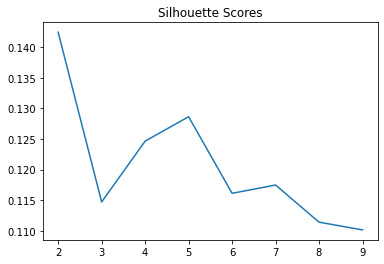

In [30]:
silhouette_scores = []
for k in range(2,10):
    estimator = KMeans(n_clusters=k)
    estimator.fit(all_data_df)
    label_pred = estimator.labels_ # Get the cluster labels
    silhouette_score_cluster = silhouette_score(all_data_df,label_pred)
    silhouette_scores.append(silhouette_score_cluster)

plt.title('Silhouette Scores')
plt.plot([i for i in range(2,10)],silhouette_scores)
plt.show()

<p>pick the number of cluster with the highest score, but maybe 5 is more reasonable</p>

In [31]:
k=2
estimator = KMeans(n_clusters=k)
estimator.fit(all_data_df)
label_pred = estimator.labels_ #Obtain the cluster labels
centroids = estimator.cluster_centers_ # Obtain the centroids
inertia = estimator.inertia_ 
all_data_df['KMeans Label'] = label_pred

In [32]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne.fit_transform(all_data_df)  # Dimension reduction
# tsne.embedding_ can return the data after dimension reduction
print('tsne.embedding_: \n', tsne.embedding_)
tsn = pd.DataFrame(tsne.embedding_, index=X.index)  # Transform the data format
print('tsne: \n', tsne)

plt.rcParams['axes.unicode_minus'] = False  # To show negative signs

tsne.embedding_: 
 [[-12.773948 -71.25441 ]
 [-36.79707   18.10746 ]
 [ 20.525099 -65.928955]
 ...
 [-35.357388  34.87803 ]
 [-25.80886   77.77019 ]
 [ 74.70819  -22.153822]]
tsne: 
 TSNE()


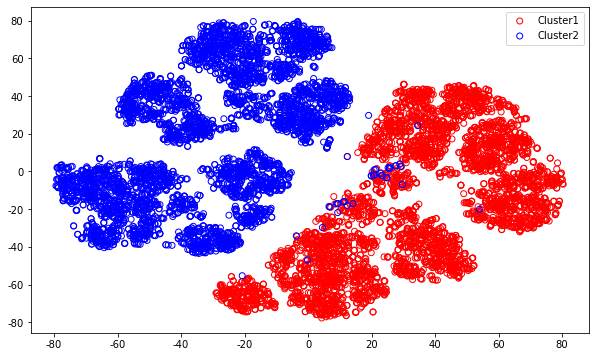

In [34]:
color_style = ['red', 'blue', 'green', 'yellow','grey']
plt.figure(figsize=(10,6))
for i in range(k):
    d = tsn[all_data_df[u'KMeans Label'] == i]
    plt.scatter(d[0], d[1],edgecolors=color_style[i],color=[], label='Cluster' + str(i+1))
plt.legend()
plt.show()

In [35]:
cont = df.select_dtypes(include=['int64','float'])
cont.reset_index(drop = True, inplace=True)
cat1 = df.select_dtypes(include='object')
cat2 = cat1.drop(['Customer','Effective To Date'], axis = 1)
all = pd.concat([cont,cat2], axis = 1)
all['Label'] = label_pred
all.to_csv('Labeled_3.csv')

In [38]:
all.groupby('Label').mean()

,Accident Severity in State,Number of Accidents in State,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Response
Label,,,,,,,,,,,
0,2.097014,324631.054984,9403.811447,37363.069736,108.697810,15.052749,48.172553,0.366786,2.948815,517.471433,0.152883
1,2.096835,324220.592060,6661.904267,37939.943133,78.358584,15.139485,47.960944,0.401288,2.982833,354.034304,0.133906


In [39]:
#
#
#
def plotdiff(feature):
    sns.barplot(x='Label',y=feature,data=all,orient='v', palette = "Purples")
    plt.title('Avearage '+feature, fontsize=15)
    plt.xticks(ticks=[0,1],labels=['cluster1','cluster2'], fontsize=15)
#
#
#

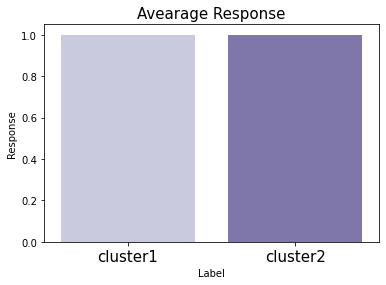

In [40]:
all['Response'] = all['Response'].apply(lambda x: 0 if x=='No' else 1)
plotdiff('Response')

In [41]:
factors = coef_df[coef_df['p-values']<0.05].index
factors

Index(['Monthly Premium Auto', 'Number of Open Complaints',
       'Number of Policies', 'Response', 'Education', 'Marital Status',
       'Renew Offer Type'],
      dtype='object')

In [42]:
all['Monthly Premium Auto'].mean()

93.21929056273265

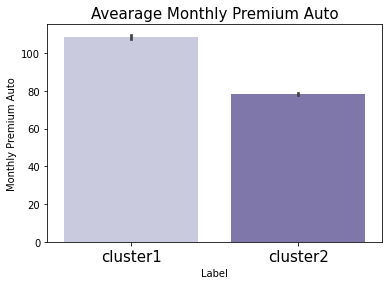

In [43]:
#all['Monthly Premium Auto'] = all['Monthly Premium Auto'].apply(lambda x: 0 if x=='No' else 1)
plotdiff('Monthly Premium Auto')

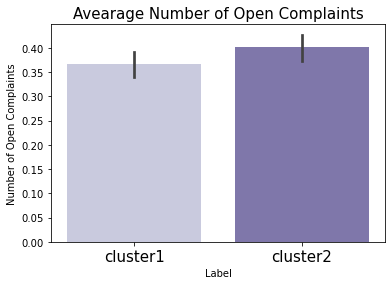

In [44]:
plotdiff('Number of Open Complaints')

In [45]:
all['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [46]:
edu_dict={'High School or Below':0 ,'Bachelor':1,'College':2, 'Master':3,  'Doctor':4}
all['Education level']=7
for i in all.index:
    all.loc[i,'Education level']=edu_dict[all.loc[i,'Education']]
#all[['Education level']] 

Text(0.5, 1.0, 'Avearage Education Level')

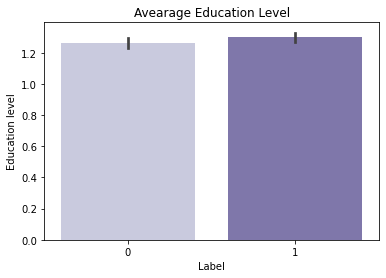

In [47]:
sns.barplot(x='Label',y='Education level',data=all,orient='v', palette = "Purples")
plt.title('Avearage Education Level')

[1307, 1390, 1412, 366, 185]


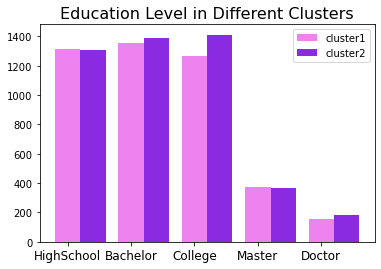

In [48]:
import matplotlib.pyplot as plt

#plt.rcParams['font.sans-serif'] = [u'SimHei'] 
#plt.rcParams['axes.unicode_minus'] = False

educationlist=['High School or Below','Bachelor','College', 'Master','Doctor']
label0_data=all[all['Label']==0]
label1_data=all[all['Label']==1]
label0_list=[]
label1_list=[]
for i in educationlist:
    d0=len(label0_data[label0_data['Education']==i])
    d1=len(label1_data[label1_data['Education']==i])
    label0_list.append(d0)
    label1_list.append(d1)

print(label1_list)

    
width=0.4
plt.bar([j for j in range(len(label0_list))], label0_list, width=width, label='cluster1', color='violet')
plt.bar([j+width for j in range(len(label1_list))], label1_list, width=width, label='cluster2', color='blueviolet')
plt.title('Education Level in Different Clusters',fontsize=16)
plt.xticks(ticks=[0,1,2,3,4],labels=['HighSchool','Bachelor','College', 'Master','Doctor'], fontsize=12)
plt.legend()
plt.show()

In [49]:
all['Marital Status'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

Text(0.5, 1.0, 'Avearage Married')

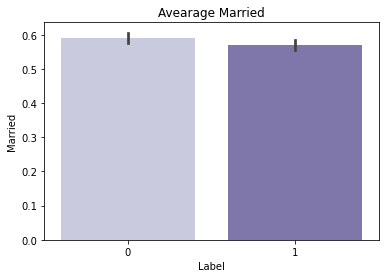

In [50]:
all['Married']=0
all['Single']=0
all['Divorced']=0
for i in all.index:
    if all.loc[i,'Marital Status']=='Married':
        all.loc[i,'Married']=1
    elif all.loc[i,'Marital Status']=='Single':
        all.loc[i,'Single']=1
    elif all.loc[i,'Marital Status']=='Divorced':
        all.loc[i,'Divorced']=1
sns.barplot(x='Label',y='Married',data=all,orient='v', palette = "Purples")
plt.title('Avearage Married')

[2656, 1250, 754]


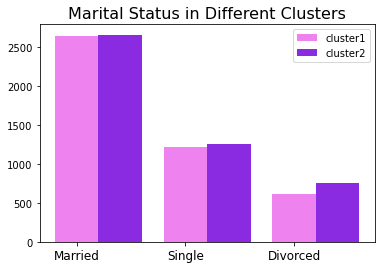

In [51]:
import matplotlib.pyplot as plt

#plt.rcParams['font.sans-serif'] = [u'SimHei'] 
#plt.rcParams['axes.unicode_minus'] = False
    
educationlist=['Married', 'Single', 'Divorced']
label0_data=all[all['Label']==0]
label1_data=all[all['Label']==1]
label0_list=[]
label1_list=[]
for i in educationlist:
    d0=len(label0_data[label0_data['Marital Status']==i])
    d1=len(label1_data[label1_data['Marital Status']==i])
    label0_list.append(d0)
    label1_list.append(d1)

print(label1_list)

    
width=0.4
plt.bar([j for j in range(len(label0_list))], label0_list, width=width, label='cluster1', color='violet')
plt.bar([j+width for j in range(len(label1_list))], label1_list, width=width, label='cluster2', color='blueviolet')
plt.title('Marital Status in Different Clusters',fontsize=16)
plt.xticks(ticks=[0,1,2],labels=['Married', 'Single', 'Divorced'], fontsize=12)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Avearage Single')

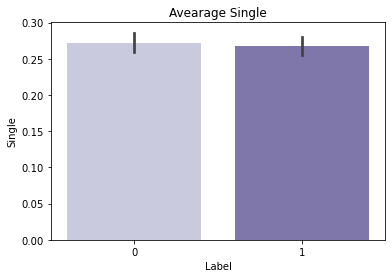

In [52]:
sns.barplot(x='Label',y='Single',data=all,orient='v', palette = "Purples")
plt.title('Avearage Single')

Text(0.5, 1.0, 'Avearage Divorced')

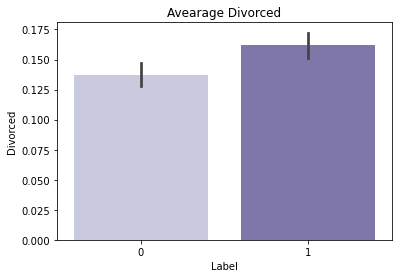

In [53]:
sns.barplot(x='Label',y='Divorced',data=all,orient='v', palette = "Purples")
plt.title('Avearage Divorced')

In [54]:
all['Renew Offer Type'].unique()

array(['Offer1', 'Offer3', 'Offer2', 'Offer4'], dtype=object)

Text(0.5, 1.0, 'Avearage Offer1')

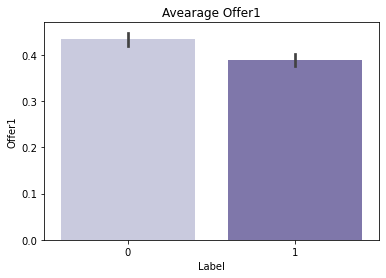

In [55]:
all['Offer1']=0
all['Offer2']=0
all['Offer3']=0
all['Offer4']=0
for i in all.index:
    if all.loc[i,'Renew Offer Type']=='Offer1':
        all.loc[i,'Offer1']=1
    elif all.loc[i,'Renew Offer Type']=='Offer2':
        all.loc[i,'Offer2']=1
    elif all.loc[i,'Renew Offer Type']=='Offer3':
        all.loc[i,'Offer3']=1
    elif all.loc[i,'Renew Offer Type']=='Offer4':
        all.loc[i,'Offer4']=1
        
sns.barplot(x='Label',y='Offer1',data=all,orient='v', palette = "Purples")
plt.title('Avearage Offer1')

Text(0.5, 1.0, 'Avearage Offer2')

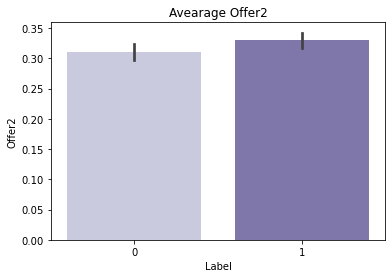

In [56]:
sns.barplot(x='Label',y='Offer2',data=all,orient='v', palette = "Purples")
plt.title('Avearage Offer2')

Text(0.5, 1.0, 'Avearage Offer3')

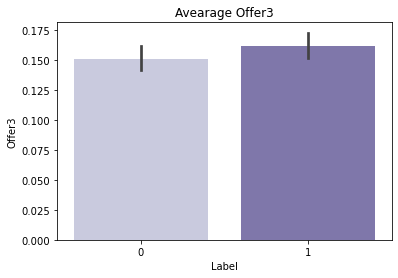

In [57]:
sns.barplot(x='Label',y='Offer3',data=all,orient='v', palette = "Purples")
plt.title('Avearage Offer3')

Text(0.5, 1.0, 'Avearage Offer4')

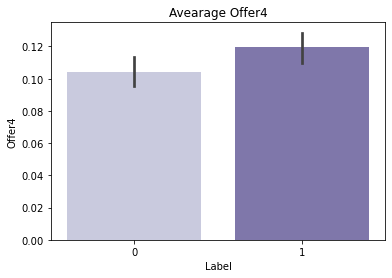

In [58]:
sns.barplot(x='Label',y='Offer4',data=all,orient='v', palette = "Purples")
plt.title('Avearage Offer4')

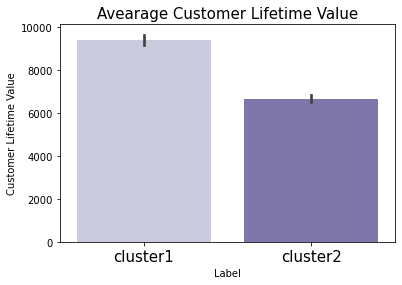

In [59]:
plotdiff('Customer Lifetime Value')

Text(0.5, 1.0, 'Avearage Number of Accidents in State')

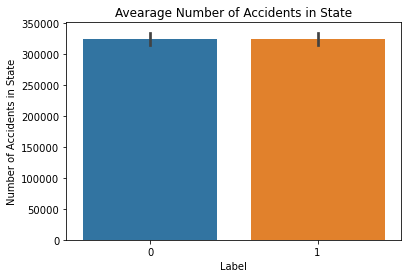

In [60]:
sns.barplot(x='Label',y='Number of Accidents in State',data=all,orient='v')
plt.title('Avearage Number of Accidents in State')

In [61]:
#
#
#
#
#
#
def catecode(column_name):
    allcategory=list(df[column_name].unique())
    print(allcategory)
    #add new column
    for i in allcategory:
        all[i]=0
    #update value
    for i in all.index:
        if all.loc[i,column_name]==allcategory[0]:
            all.loc[i,allcategory[0]]=1
        #other catogories
        c=1
        while c < len(allcategory):
            if all.loc[i,column_name]==allcategory[c]:
                all.loc[i,allcategory[c]]=1
            c+=1
#
#
#
#
#
catecode('EmploymentStatus')
all

['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired']


,Accident Severity in State,Number of Accidents in State,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,...,Divorced,Offer1,Offer2,Offer3,Offer4,Employed,Unemployed,Medical Leave,Disabled,Retired
0,2.305062,32554,2763.519279,56274,69,32,5,0,1,384.811147,...,0,1,0,0,0,1,0,0,0,0
1,2.069553,56504,6979.535903,0,94,13,42,0,8,1131.464935,...,0,0,0,1,0,0,1,0,0,0
2,2.226077,6197,12887.431650,48767,108,18,38,0,2,566.472247,...,0,1,0,0,0,1,0,0,0,0
3,2.041998,795868,7645.861827,0,106,18,65,0,7,529.881344,...,0,1,0,0,0,0,1,0,0,0
4,2.305062,32554,2813.692575,43836,73,12,44,0,1,138.130879,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2.041998,795868,23405.987980,71941,73,18,89,0,2,198.234764,...,0,0,1,0,0,1,0,0,0,0
9130,2.041998,795868,3096.511217,21604,79,14,28,0,1,379.200000,...,1,1,0,0,0,1,0,0,0,0
9131,2.041998,795868,8163.890428,0,85,9,37,3,2,790.784983,...,0,1,0,0,0,0,1,0,0,0
9132,2.041998,795868,7524.442436,21941,96,34,3,0,3,691.200000,...,0,0,0,1,0,1,0,0,0,0


Text(0.5, 1.0, 'Avearage Employed')

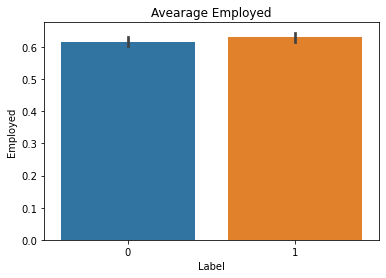

In [62]:
sns.barplot(x='Label',y='Employed',data=all,orient='v')
plt.title('Avearage Employed')

Text(0.5, 1.0, 'Avearage Unemployed')

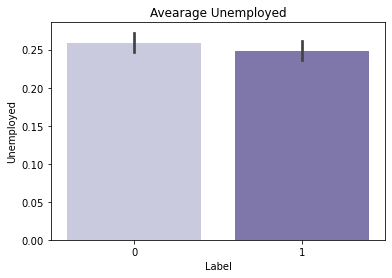

In [63]:
sns.barplot(x='Label',y='Unemployed',data=all,orient='v', palette = "Purples")
plt.title('Avearage Unemployed')

Text(0.5, 1.0, 'Avearage Medical Leave')

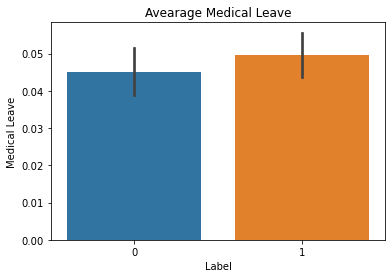

In [64]:
sns.barplot(x='Label',y='Medical Leave',data=all,orient='v')
plt.title('Avearage Medical Leave')

Text(0.5, 1.0, 'Avearage Disabled')

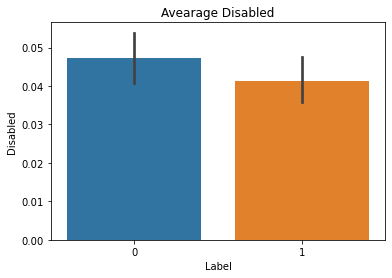

In [65]:

sns.barplot(x='Label',y='Disabled',data=all,orient='v')
plt.title('Avearage Disabled')

Text(0.5, 1.0, 'Avearage Retired')

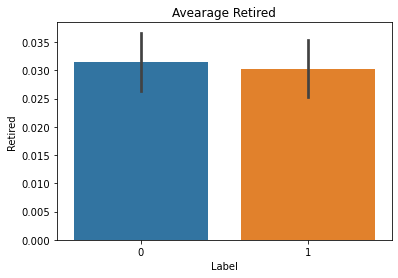

In [66]:
sns.barplot(x='Label',y='Retired',data=all,orient='v')
plt.title('Avearage Retired')

In [67]:
catecode('Location Code')

['Suburban', 'Rural', 'Urban']


In [68]:
Suburban=all[all['Location Code']=='Suburban']
gb_sub=Suburban.groupby('Label').size()
gb_sub

Label
0    2910
1    2869
dtype: int64

In [69]:
Rural=all[all['Location Code']=='Rural']
gb_rur=Rural.groupby('Label').size()
gb_rur

Label
0    816
1    957
dtype: int64

In [70]:
Rural=all[all['Location Code']=='Urban']
gb_rur=Rural.groupby('Label').size()
gb_rur

Label
0    748
1    834
dtype: int64

In [71]:
catecode('Vehicle Class')

['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car', 'Luxury Car']


In [72]:
lux_suv=all[all['Vehicle Class']=='Luxury SUV']
gb=lux_suv.groupby('Label').size()
#sns.barplot(x='Label',y='Luxury SUV',data=all,orient='v', palette = "Purples")
#plt.title('Luxury SUV')

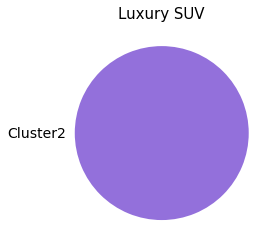

In [73]:
plt.pie([184],labels=['Cluster2'], textprops = {'fontsize':14}, colors=['mediumpurple'])
#plt.legend()
plt.title('Luxury SUV', fontsize=15)
plt.show()

In [74]:
lux_car=all[all['Vehicle Class']=='Luxury Car']
gb=lux_car.groupby('Label').size()
gb
#sns.barplot(x='Label',y='Luxury Car',data=all,orient='v', palette = "Purples")
#plt.title('Luxury Car')

Label
0    124
1     39
dtype: int64

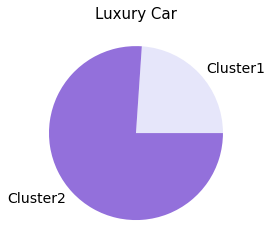

In [75]:
plt.pie([39,124],labels=['Cluster1', 'Cluster2'], textprops = {'fontsize':14}, colors=['lavender', 'mediumpurple'])
#plt.legend()
plt.title('Luxury Car', fontsize=15)
plt.show()

In [76]:
td_car=all[all['Vehicle Class']=='Two-Door Car']
gb=td_car.groupby('Label').size()
gb

#sns.barplot(x='Label',y='Two-Door Car',data=all,orient='v')
#plt.title('Two-Door Car')

Label
0    1886
dtype: int64

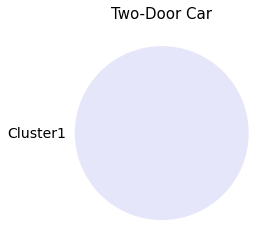

In [77]:
plt.pie([1886],labels=['Cluster1'], textprops = {'fontsize':14}, colors=['lavender'])
#plt.legend()
plt.title('Two-Door Car', fontsize=15)
plt.show()